In [ ]:
!unzip '/content/traffic.zip'

unzip:  cannot find or open /content/traffic.zip, /content/traffic.zip.zip or /content/traffic.zip.ZIP.


In [ ]:
import pandas as pd

df= pd.read_csv('/content/traffic_dataset_with_trend.csv', parse_dates=['Timestamp'], index_col=['Timestamp'])

df

,Weather,Events,Traffic Volume
Timestamp,,,
2023-01-01 00:00:00,Cloudy,False,803.0
2023-01-01 01:00:00,Clear,False,861.0
2023-01-01 02:00:00,Clear,False,582.0
2023-01-01 03:00:00,Cloudy,False,236.0
2023-01-01 04:00:00,Cloudy,False,569.0
...,...,...,...
2023-12-30 19:00:00,Cloudy,False,1118.0
2023-12-30 20:00:00,Clear,False,1681.0
2023-12-30 21:00:00,Cloudy,False,833.0


In [ ]:
df.head()

,Weather,Events,Traffic Volume
Timestamp,,,
2023-01-01 00:00:00,Cloudy,False,803.0
2023-01-01 01:00:00,Clear,False,861.0
2023-01-01 02:00:00,Clear,False,582.0
2023-01-01 03:00:00,Cloudy,False,236.0
2023-01-01 04:00:00,Cloudy,False,569.0


In [ ]:
df.sample(10)

,Weather,Events,Traffic Volume
Timestamp,,,
2023-04-05 04:00:00,Clear,False,814.0
2023-01-05 14:00:00,Clear,False,1024.0
2023-07-25 07:00:00,Clear,False,1358.0
2023-05-07 22:00:00,Rain,False,863.0
2023-10-11 10:00:00,Clear,False,1767.0
2023-04-02 04:00:00,Clear,False,805.0
2023-02-21 08:00:00,Clear,False,1193.0
2023-03-26 15:00:00,Clear,False,1198.0
2023-02-15 12:00:00,Cloudy,False,1422.0


# Exploratory Data Analysis (EDA)




Inspect the dataset

Dataset structure

Summary statistics

Check for missing values

Distribution of features

Categorical feature analysis

Correlation matrix

Outlier detection

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8736 entries, 2023-01-01 00:00:00 to 2023-12-30 23:00:00
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Weather         8736 non-null   object 
 1   Events          8736 non-null   bool   
 2   Traffic Volume  8736 non-null   float64
dtypes: bool(1), float64(1), object(1)
memory usage: 213.3+ KB


In [ ]:
df.dtypes

,0
Weather,object
Events,bool
Traffic Volume,float64


In [ ]:
df.describe()

,Traffic Volume
count,8736.000000
mean,1281.395833
std,727.291462
min,118.000000
25%,893.000000
50%,1123.000000
75%,1415.000000
max,6465.000000


In [ ]:
df.describe(include=['object'])

,Weather
count,8736
unique,4
top,Clear
freq,5164


In [ ]:
df.isnull().sum()

,0
Weather,0
Events,0
Traffic Volume,0


In [ ]:
df.duplicated().sum()

4861

In [ ]:
df.drop_duplicates(inplace=True)

array([[<Axes: title={'center': 'Traffic Volume'}>, <Axes: >, <Axes: >]],
      dtype=object)

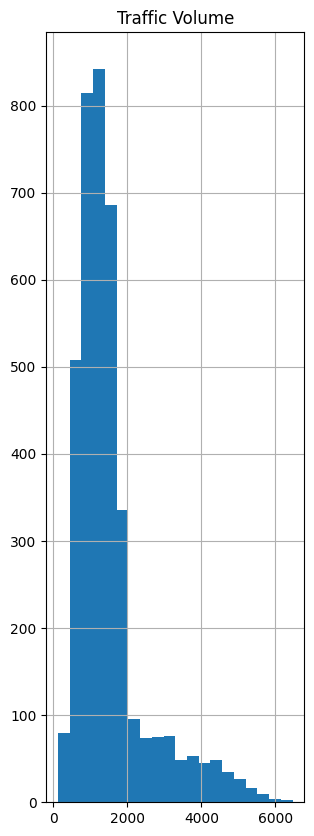

In [ ]:
# Histograms for numeric features
df.hist(bins=20, figsize=(12, 10), layout=(len(df.columns)//3, 3))

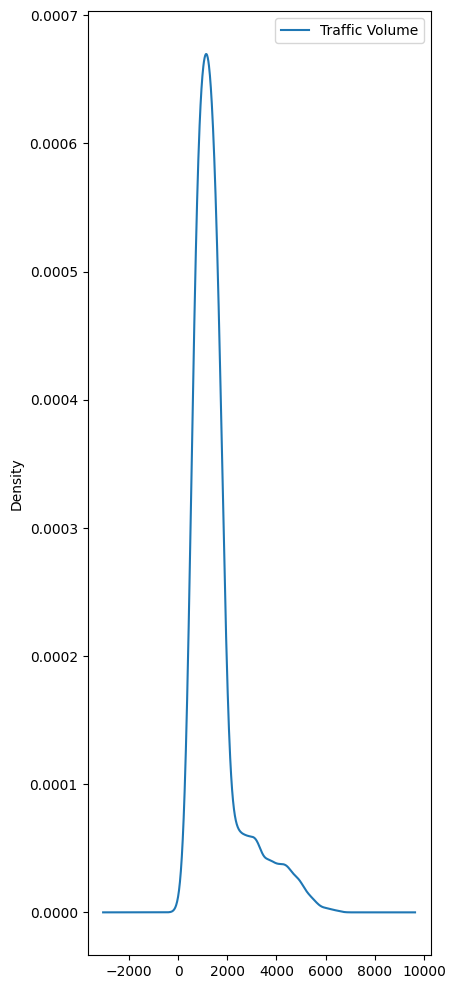

In [ ]:
# Density plots for numeric features
import matplotlib.pyplot as plt

df.plot(kind='density', subplots=True, layout=(len(df.columns)//3, 3), figsize=(12, 10))
plt.tight_layout()
plt.show()


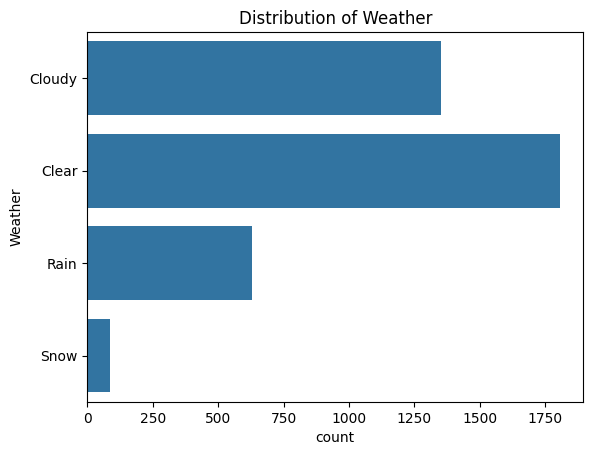

In [ ]:
# Bar plot for categorical columns
import seaborn as sns
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(y=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


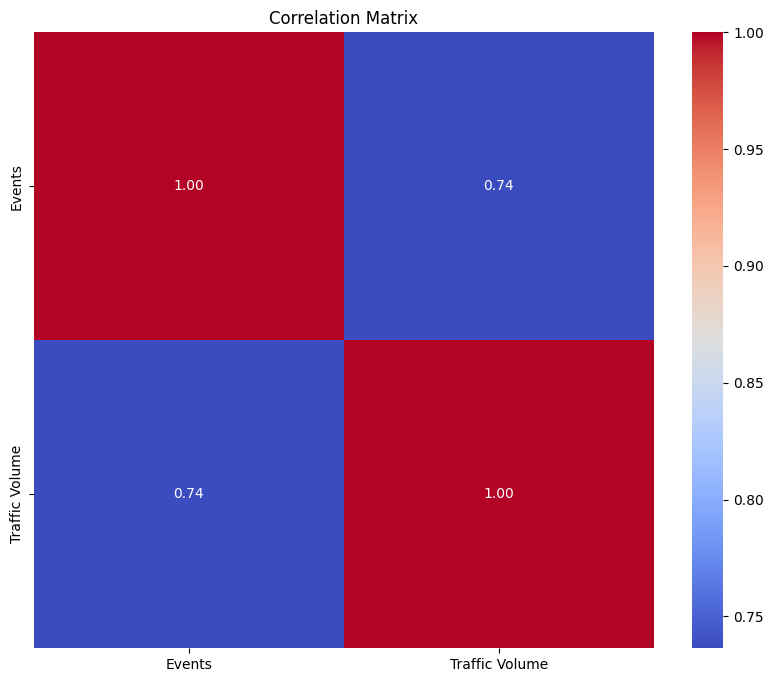

In [ ]:
# Heatmap
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

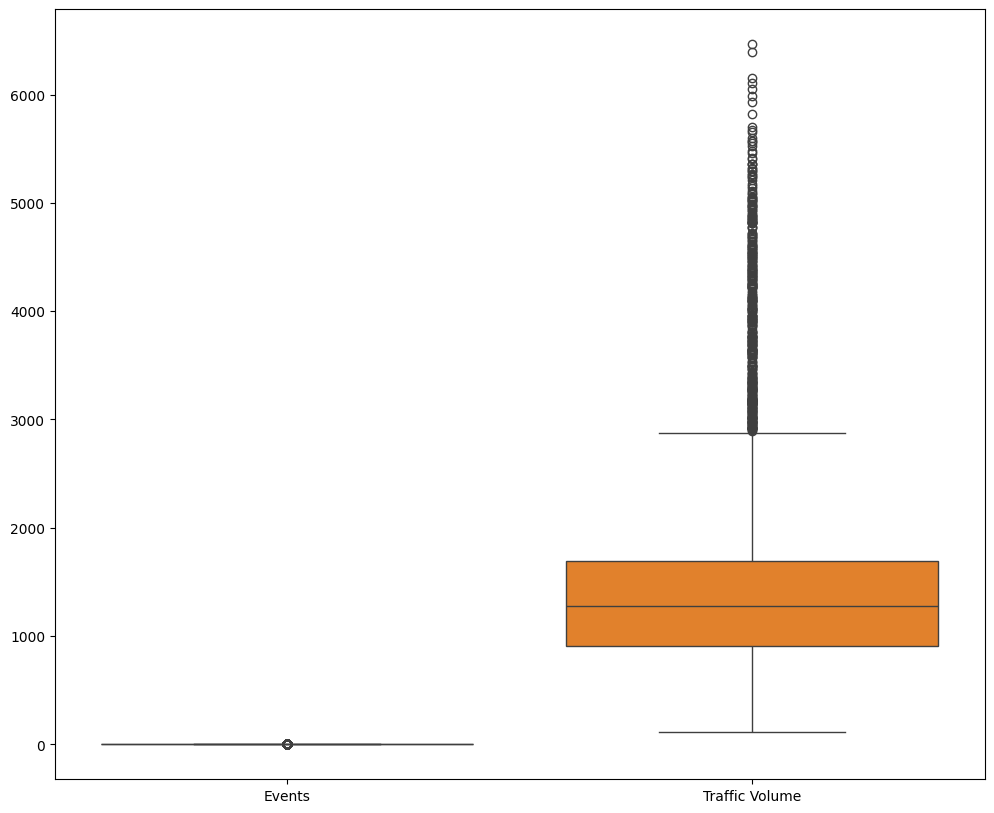

In [ ]:
# detect outlires
plt.figure(figsize=(12, 10))
sns.boxplot(data=df)

plt.show()

In [ ]:
# function to handle outlires

def handle_outliers(df):

    numeric_cols = df.select_dtypes(include=['float64', 'int64'])


    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1

    # Filter out rows with outlires
    is_outlier = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))


    df.drop(df[is_outlier.any(axis=1)].index, inplace=True)


handle_outliers(df)


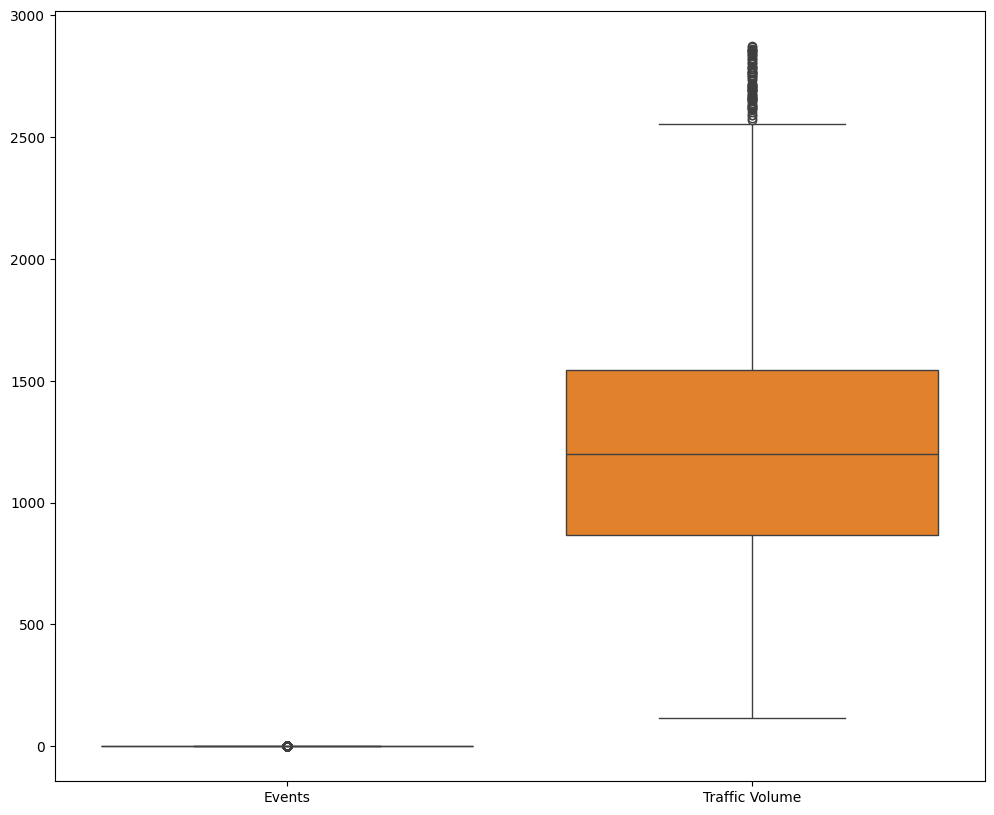

In [ ]:
# detect outlires
plt.figure(figsize=(12, 10))
sns.boxplot(data=df)

plt.show()


In [ ]:
df['Events'].unique()

array([False,  True])

In [ ]:
# label encoder for cities, Vehicle type, Day of the week, weather
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Events'] = label_encoder.fit_transform(df['Events'])

df['Weather'] = label_encoder.fit_transform(df['Weather'])

In [ ]:
df

,Weather,Events,Traffic Volume
Timestamp,,,
2023-01-01 00:00:00,1,0,803.0
2023-01-01 01:00:00,0,0,861.0
2023-01-01 02:00:00,0,0,582.0
2023-01-01 03:00:00,1,0,236.0
2023-01-01 04:00:00,1,0,569.0
...,...,...,...
2023-12-30 00:00:00,0,1,1597.0
2023-12-30 03:00:00,1,1,1028.0
2023-12-30 04:00:00,0,0,506.0


# Deep Learning

# Time Series Analysis



In [ ]:
df.drop(columns=['Events','Weather'], inplace=True)

In [ ]:
df.sort_index(inplace=True)

# Split the Dataset

We have two targets: Traffic Density and Random Event Ocurr. Will Split the data into two parts.

In [ ]:


train_len = int(len(df) * 0.7) # 70% for training
val_len = int(len(df) * 0.15) # 15% for validation

# Split the data
train = df.iloc[:train_len]
val = df.iloc[train_len:train_len + val_len]
test = df.iloc[train_len + val_len:]

In [ ]:
train.shape, val.shape, test.shape

((2443, 1), (523, 1), (525, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)# Min train, max train

train_pre= scaler.transform(train) # train - min_train / max_train-min_train
val_pre = scaler.transform(val) # val - min_train / max_train-min_train
test_pre = scaler.transform(test) # test - min_train / max_train-min_train

In [ ]:
from tensorflow.keras.utils import timeseries_dataset_from_array

window_size = 50 # take the first 10 hours to predict the next hour

train_Xy = timeseries_dataset_from_array(train_pre, targets=train_pre[window_size:], sequence_length=window_size)
val_Xy = timeseries_dataset_from_array(val_pre, targets=val_pre[window_size:], sequence_length=window_size)
test_Xy = timeseries_dataset_from_array(test_pre, targets=test_pre[window_size:], sequence_length=window_size)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

## SimpleRNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Build Arch
RNN_model = Sequential([SimpleRNN(units=100, activation='tanh', return_sequences=True ), # 1st hidden layer
                    SimpleRNN(units=100, activation='tanh', return_sequences=True ), # 2nd hidden layer
                    SimpleRNN(units=100, activation='tanh' ), # 3rd hidden layer

                    Dense(units=1, activation='relu')]) #output

# Compile -> set configration
RNN_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit -> train
RNN_history = RNN_model.fit(train_Xy, validation_data=val_Xy, epochs=100, callbacks=[early_stopping])

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - loss: 0.1087 - mae: 0.2625 - val_loss: 0.0403 - val_mae: 0.1589
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0478 - mae: 0.1775 - val_loss: 0.0589 - val_mae: 0.1940
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0500 - mae: 0.1806 - val_loss: 0.0375 - val_mae: 0.1568
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0287 - mae: 0.1315 - val_loss: 0.0376 - val_mae: 0.1538
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0321 - mae: 0.1408 - val_loss: 0.0369 - val_mae: 0.1529
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0308 - mae: 0.1372 - val_loss: 0.0383 - val_mae: 0.1547
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0329 - mae: 0.1425 - val_loss: 0.0395 - val_mae: 0.1569
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0337 - mae: 0.1446 - val_loss: 0.0392 - val_mae: 0.1562
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - l

In [ ]:
RNN_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, None, 100)           │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, None, 100)           │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,505 (591.82 KB)

 Trainable params: 50,501 (197.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,004 (394.55 KB)

<Axes: >

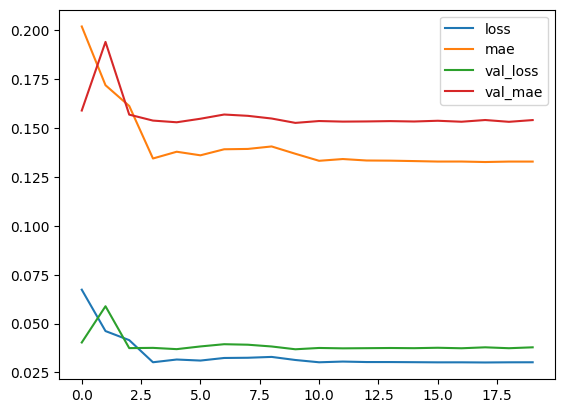

In [ ]:
pd.DataFrame(RNN_history.history).plot()

In [ ]:
# Make predictions
X_test, y_test = next(iter(test_Xy))

RNN_predict = RNN_model.predict(X_test)
RNN_predict

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step 


array([[0.5080742 ],
       [0.48488775],
       [0.48698756],
       [0.49942806],
       [0.43959007],
       [0.43804803],
       [0.39028254],
       [0.47294137],
       [0.47578183],
       [0.555746  ],
       [0.4797673 ],
       [0.42947856],
       [0.4214581 ],
       [0.42520472],
       [0.3849168 ],
       [0.46583432],
       [0.52075654],
       [0.4271169 ],
       [0.5456163 ],
       [0.4731314 ],
       [0.42935202],
       [0.43154064],
       [0.49629483],
       [0.49837133],
       [0.522997  ],
       [0.49543813],
       [0.50782305],
       [0.46271673],
       [0.46154246],
       [0.41719386],
       [0.41256353],
       [0.4344971 ],
       [0.49487725],
       [0.44642988],
       [0.4361002 ],
       [0.45470712],
       [0.41595414],
       [0.45967814],
       [0.48814455],
       [0.44527194],
       [0.41514096],
       [0.50553995],
       [0.42277142],
       [0.4282159 ],
       [0.42179528],
       [0.48683593],
       [0.5051714 ],
       [0.427

In [ ]:
# Inverse transform predictions
inverted_RNN_predict = scaler.inverse_transform(RNN_predict)

# Adjust actual traffic flow to match the size of predicted traffic flow
y_true= scaler.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate the model
mse = mean_squared_error(y_true, inverted_RNN_predict)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 254382.5498842263
RMSE: 504.363509667607


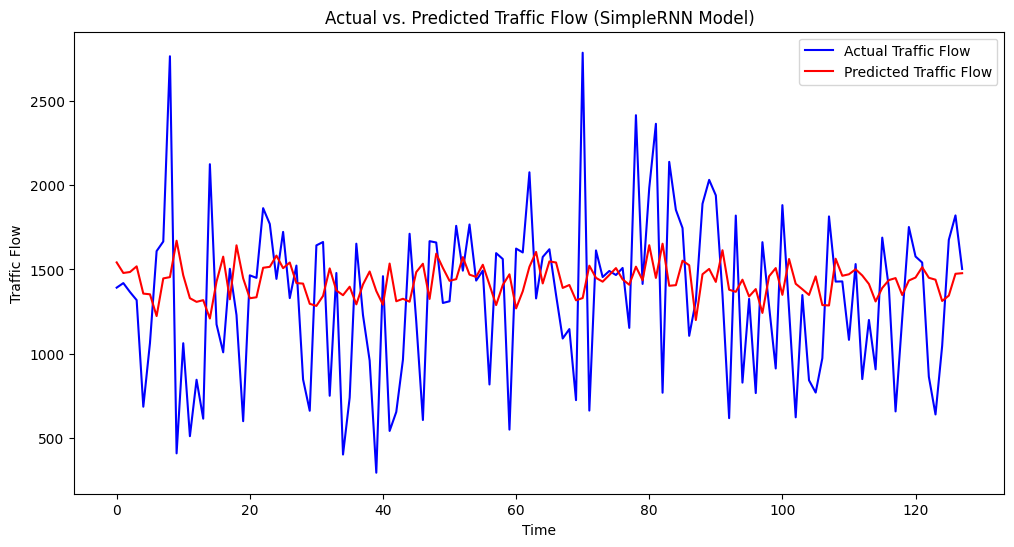

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_true, color='blue', label='Actual Traffic Flow')
plt.plot(inverted_RNN_predict, color='red', label='Predicted Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow (SimpleRNN Model)')
plt.xlabel('Time')
plt.ylabel('Traffic Flow')
plt.legend()
plt.show()


## GRU Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Bidirectional, LSTM

In [ ]:


# Build Arch
GRU_model = Sequential([GRU(units=100, activation='tanh', return_sequences=True ), # 1st hidden layer
                    GRU(units=100, activation='tanh', return_sequences=True ), # 2nd hidden layer
                    GRU(units=100, activation='tanh' ), # 3rd hidden layer

                    Dense(units=1, activation='relu')]) #output

# Compile -> set configration
GRU_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit -> train
GRU_history = GRU_model.fit(train_Xy, validation_data=val_Xy, epochs=100, callbacks=[early_stopping])

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0573 - mae: 0.1899 - val_loss: 0.0410 - val_mae: 0.1605
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0297 - mae: 0.1337 - val_loss: 0.0385 - val_mae: 0.1561
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0288 - mae: 0.1311 - val_loss: 0.0388 - val_mae: 0.1563
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0298 - mae: 0.1349 - val_loss: 0.0394 - val_mae: 0.1571
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0311 - mae: 0.1392 - val_loss: 0.0393 - val_mae: 0.1568
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0317 - mae: 0.1416 - val_loss: 0.0392 - val_mae: 0.1565
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0312 - mae: 0.1400 - val_loss: 0.0384 - val_mae: 0.1551
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0314 - mae: 0.1407 - val_loss: 0.0373 - val_mae: 0.1531
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - lo

<Axes: >

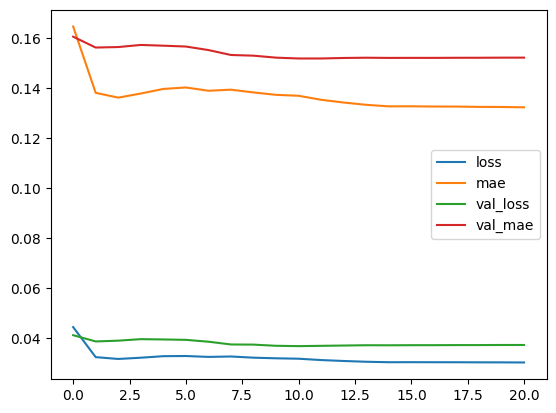

In [ ]:
pd.DataFrame(GRU_history.history).plot()

In [ ]:
# Make predictions
GRU_predict = GRU_model.predict(X_test)
GRU_predict

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


array([[0.48221138],
       [0.45839277],
       [0.44324294],
       [0.43313995],
       [0.4254785 ],
       [0.3707407 ],
       [0.3736133 ],
       [0.42362583],
       [0.45896772],
       [0.5567015 ],
       [0.39680734],
       [0.3758408 ],
       [0.336581  ],
       [0.344159  ],
       [0.33724737],
       [0.43960842],
       [0.43696597],
       [0.40636936],
       [0.42793036],
       [0.42211938],
       [0.36396852],
       [0.40005192],
       [0.42921072],
       [0.47329366],
       [0.48770782],
       [0.46167517],
       [0.46833628],
       [0.44212294],
       [0.44325146],
       [0.3912126 ],
       [0.35064042],
       [0.4083156 ],
       [0.45296514],
       [0.39502925],
       [0.41708723],
       [0.34941432],
       [0.33894092],
       [0.40764806],
       [0.42157117],
       [0.39763495],
       [0.32875344],
       [0.38069835],
       [0.3526401 ],
       [0.33911282],
       [0.35830972],
       [0.426471  ],
       [0.42664653],
       [0.368

In [ ]:
# Inverse transform predictions
inverted_GRU_predict = scaler.inverse_transform(GRU_predict)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_true, inverted_GRU_predict)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 244242.06127442396
RMSE: 494.20852003423005


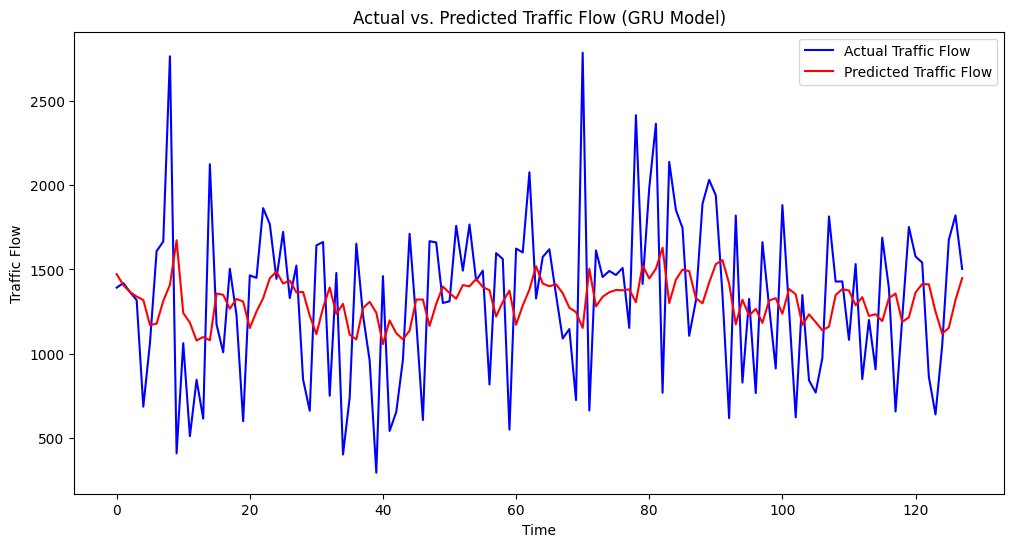

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_true, color='blue', label='Actual Traffic Flow')
plt.plot(inverted_GRU_predict, color='red', label='Predicted Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow (GRU Model)')
plt.xlabel('Time')
plt.ylabel('Traffic Flow')
plt.legend()
plt.show()

## LSTM


In [ ]:

# Build Arch
LSTM_model = Sequential([LSTM(units=100, activation='tanh', return_sequences=True ), # 1st hidden layer
                    LSTM(units=100, activation='tanh', return_sequences=True ), # 2nd hidden layer
                    LSTM(units=100, activation='tanh' ), # 3rd hidden layer

                    Dense(units=1, activation='relu')]) #output

# Compile -> set configration
LSTM_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit -> train
LSTM_history = LSTM_model.fit(train_Xy, validation_data=val_Xy, epochs=100)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0573 - mae: 0.1898 - val_loss: 0.0398 - val_mae: 0.1626
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0279 - mae: 0.1271 - val_loss: 0.0380 - val_mae: 0.1586
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0279 - mae: 0.1291 - val_loss: 0.0376 - val_mae: 0.1575
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0283 - mae: 0.1302 - val_loss: 0.0375 - val_mae: 0.1575
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0283 - mae: 0.1300 - val_loss: 0.0373 - val_mae: 0.1569
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0287 - mae: 0.1312 - val_loss: 0.0372 - val_mae: 0.1561
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0294 - mae: 0.1334 - val_loss: 0.0373 - val_mae: 0.1556
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0301 - mae: 0.1358 - val_loss: 0.0370 - val_mae: 0.1558
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - lo

In [ ]:
LSTM_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, None, 100)           │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, None, 100)           │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 605,105 (2.31 MB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 403,404 (1.54 MB)

<Axes: >

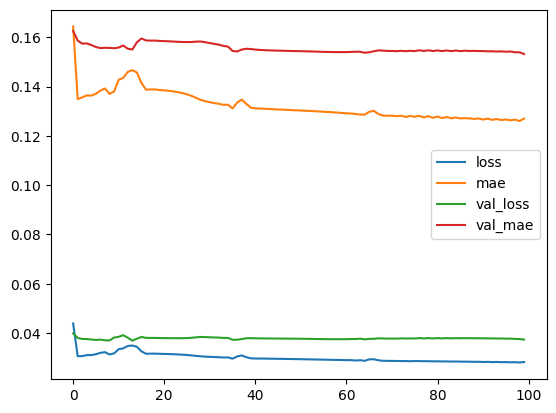

In [ ]:
pd.DataFrame(LSTM_history.history).plot()

In [ ]:
# Make predictions
LSTM_predict = GRU_model.predict(X_test)
LSTM_predict

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[0.48221138],
       [0.45839277],
       [0.44324294],
       [0.43313995],
       [0.4254785 ],
       [0.3707407 ],
       [0.3736133 ],
       [0.42362583],
       [0.45896772],
       [0.5567015 ],
       [0.39680734],
       [0.3758408 ],
       [0.336581  ],
       [0.344159  ],
       [0.33724737],
       [0.43960842],
       [0.43696597],
       [0.40636936],
       [0.42793036],
       [0.42211938],
       [0.36396852],
       [0.40005192],
       [0.42921072],
       [0.47329366],
       [0.48770782],
       [0.46167517],
       [0.46833628],
       [0.44212294],
       [0.44325146],
       [0.3912126 ],
       [0.35064042],
       [0.4083156 ],
       [0.45296514],
       [0.39502925],
       [0.41708723],
       [0.34941432],
       [0.33894092],
       [0.40764806],
       [0.42157117],
       [0.39763495],
       [0.32875344],
       [0.38069835],
       [0.3526401 ],
       [0.33911282],
       [0.35830972],
       [0.426471  ],
       [0.42664653],
       [0.368

In [ ]:
# Inverse transform predictions
inverted_LSTM_predict = scaler.inverse_transform(LSTM_predict)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_true, inverted_LSTM_predict)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 244242.06127442396
RMSE: 494.20852003423005


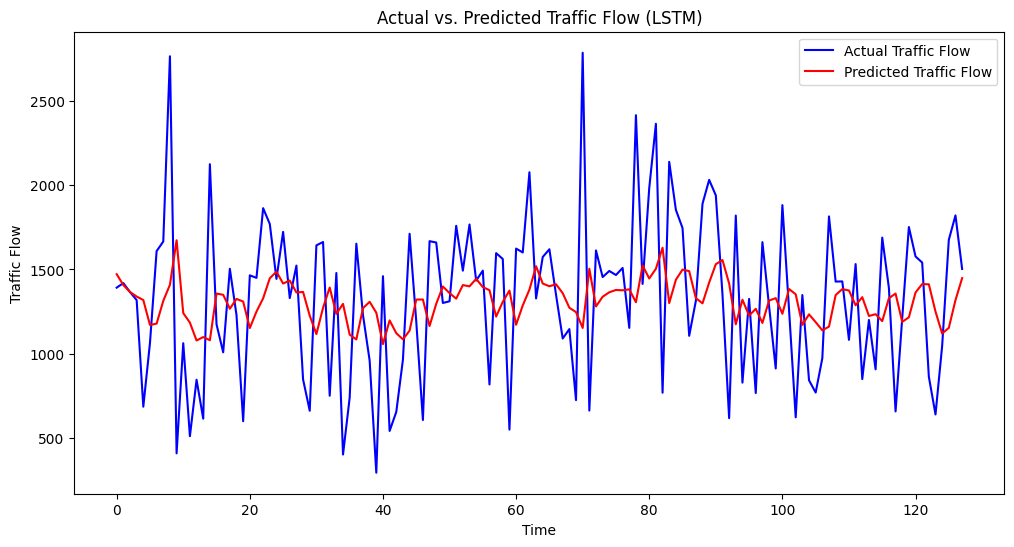

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_true, color='blue', label='Actual Traffic Flow')
plt.plot(inverted_LSTM_predict, color='red', label='Predicted Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow (LSTM)')
plt.xlabel('Time')
plt.ylabel('Traffic Flow')
plt.legend()
plt.show()

## Complex Model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Build Arch
complex_model = Sequential([
    Bidirectional(LSTM(units=128, activation='tanh', return_sequences=True)), # 1st hidden layer
    Dropout(0.2),
    Bidirectional(GRU(units=128, activation='tanh', return_sequences=True)), # 2nd hidden layer
    Dropout(0.2),
    LSTM(units=128, activation='tanh'), # 3rd hidden layer
    Dropout(0.2),
    Dense(units=1, activation='relu') #output
])



# Compile -> set configration
complex_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit -> train
complex_history = complex_model.fit(train_Xy, validation_data=val_Xy, epochs=100, callbacks=[early_stopping])

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0532 - mae: 0.1789 - val_loss: 0.0380 - val_mae: 0.1574
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0283 - mae: 0.1291 - val_loss: 0.0374 - val_mae: 0.1559
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0269 - mae: 0.1238 - val_loss: 0.0376 - val_mae: 0.1563
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0263 - mae: 0.1235 - val_loss: 0.0375 - val_mae: 0.1560
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0264 - mae: 0.1236 - val_loss: 0.0371 - val_mae: 0.1550
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0265 - mae: 0.1237 - val_loss: 0.0378 - val_mae: 0.1565
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0266 - mae: 0.1232 - val_loss: 0.0375 - val_mae: 0.1556
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0262 - mae: 0.1230 - val_loss: 0.0380 - val_mae: 0.1565
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - lo

<Axes: >

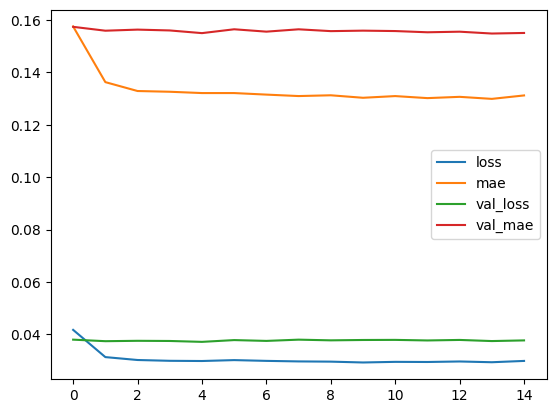

In [ ]:
pd.DataFrame(complex_history.history).plot()

In [ ]:
complex_predict = complex_model.predict(X_test)
complex_predict

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


array([[0.45487708],
       [0.4409657 ],
       [0.4293711 ],
       [0.41781262],
       [0.40802366],
       [0.3693828 ],
       [0.36704922],
       [0.39974275],
       [0.42602363],
       [0.4968356 ],
       [0.4148506 ],
       [0.38968736],
       [0.34768718],
       [0.3438067 ],
       [0.3360121 ],
       [0.41714075],
       [0.42035022],
       [0.4079981 ],
       [0.4230889 ],
       [0.41684183],
       [0.37707418],
       [0.3974097 ],
       [0.41207108],
       [0.4419473 ],
       [0.45270848],
       [0.43767494],
       [0.43889442],
       [0.41793156],
       [0.41413805],
       [0.3777186 ],
       [0.34662825],
       [0.38485634],
       [0.41592643],
       [0.38737535],
       [0.40603003],
       [0.3624094 ],
       [0.3528199 ],
       [0.40038016],
       [0.41070375],
       [0.40002307],
       [0.3550497 ],
       [0.38929093],
       [0.36526906],
       [0.35496187],
       [0.3669378 ],
       [0.41634563],
       [0.4183531 ],
       [0.382

In [ ]:
# Inverse transform predictions
inverted_complex_predict = scaler.inverse_transform(complex_predict)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_true, inverted_complex_predict)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 243806.64085630723
RMSE: 493.76780054627625


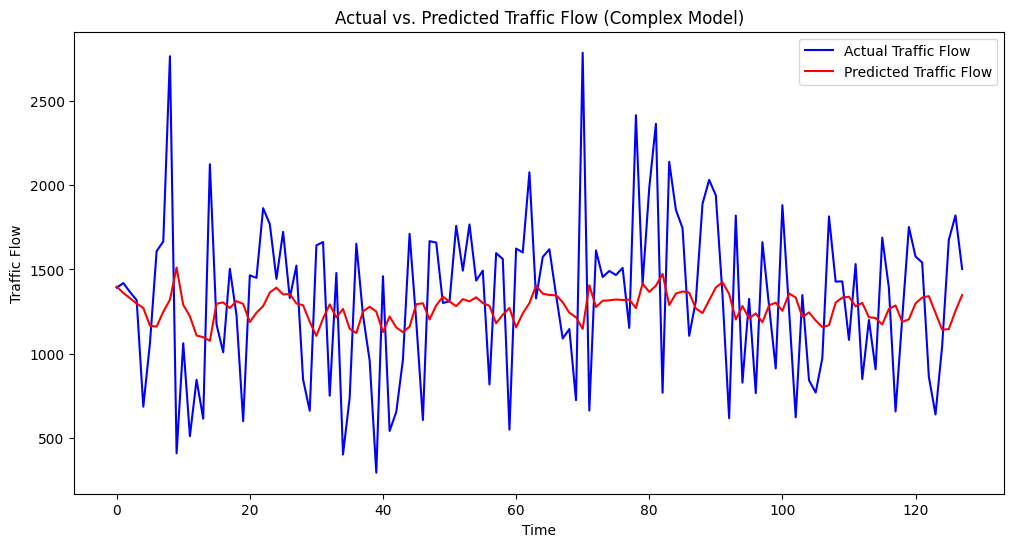

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_true, color='blue', label='Actual Traffic Flow')
plt.plot(inverted_complex_predict, color='red', label='Predicted Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow (Complex Model)')
plt.xlabel('Time')
plt.ylabel('Traffic Flow')
plt.legend()
plt.show()

# Combine Traffic Flow and Accident Prediction

Multimodal Prediction: You can use deep learning to handle both traffic flow prediction and accident detection simultaneously. This involves creating a model with multiple outputs (one for traffic flow prediction, the other for accident prediction).

Multi-Task Learning: Create a model that learns to predict both traffic flow and accidents from the same set of features. For example, you can have one output for traffic flow (regression) and another for accident probability (classification).

# Real-Time Traffic Prediction

Train your LSTM/GRU models with continuous live traffic data and provide real-time traffic flow predictions and alerts for accidents.

# Alert System Logic
Setting Conditions for Alerts: Based on the model’s predictions, set thresholds for when to alert users.